# Clustering Veriyi Benzerliklerine Göre Gruplandırma

In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("cars.xls")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
# Hatırlatma-Remember This
# Regession r2 RMSE
# Classification Accuracy, F1 Score Classification Report and Confusion Matrix
# Clustersing Slihoutte Score

In [5]:
x=df[["Price", "Mileage", "Cylinder"]]

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [8]:
model=KMeans(15) #sayı grup sayısı

In [9]:
model=model.fit(x)

/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
tahmin=model.predict(x)

In [11]:
tahmin

array([ 6,  6,  0,  0,  3,  3,  3,  3, 13, 13,  6, 10, 10, 10, 14, 14, 14,
       14,  9,  9,  6,  6, 10, 10, 10, 10, 10, 14, 14, 14, 10, 10, 10, 14,
       14, 14, 14, 14, 14, 14,  5,  6, 10, 10, 10, 14, 14, 14, 14, 14, 10,
       10, 10, 10, 10, 14, 14, 14, 14, 14,  6,  6, 10, 10, 10, 14, 14, 14,
       14, 14, 11, 11, 11, 11,  4, 10, 14, 14, 14,  1,  2,  2,  2,  8,  8,
        8,  8,  8,  8,  8, 11, 11, 11, 11,  4,  4,  4,  4,  4,  4,  2,  2,
        2,  8,  8,  8,  8,  8,  8,  8,  2,  2,  2,  2,  8,  8,  8,  8,  1,
        1, 11, 11, 11, 11,  4,  4,  4,  4,  4,  4,  2,  2,  2,  8,  8,  8,
        8,  8,  8,  1,  2,  2,  2,  2,  8,  8,  8,  8,  8,  8,  7,  7,  7,
        7,  7,  7, 12, 12, 12, 12,  0,  0,  3,  3,  3,  3,  3, 13, 13, 13,
        5,  5,  0,  0,  0,  0,  3, 13,  9,  9,  3,  3,  3,  3,  3,  3, 13,
       13, 13, 13,  5,  0,  0,  3,  3,  3, 13, 13, 13,  9,  5,  5,  5,  0,
        0,  0,  3,  3,  3, 13,  5,  0,  3,  3,  3, 13, 13, 13,  9,  9,  5,
        0,  3,  3,  3,  3

In [12]:
x["cluster"]=tahmin

/var/folders/qk/bh_v999j6_vd_fc7lhdmhp280000gn/T/ipykernel_2463/354242828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["cluster"]=tahmin


In [13]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,6
1,17542.036083,9135,6,6
2,16218.847862,13196,6,0
3,16336.913140,16342,6,0
4,16339.170324,19832,6,3


In [14]:
silhouette_score(x,tahmin)

0.35337633295355375

In [15]:
import matplotlib.pyplot as plt

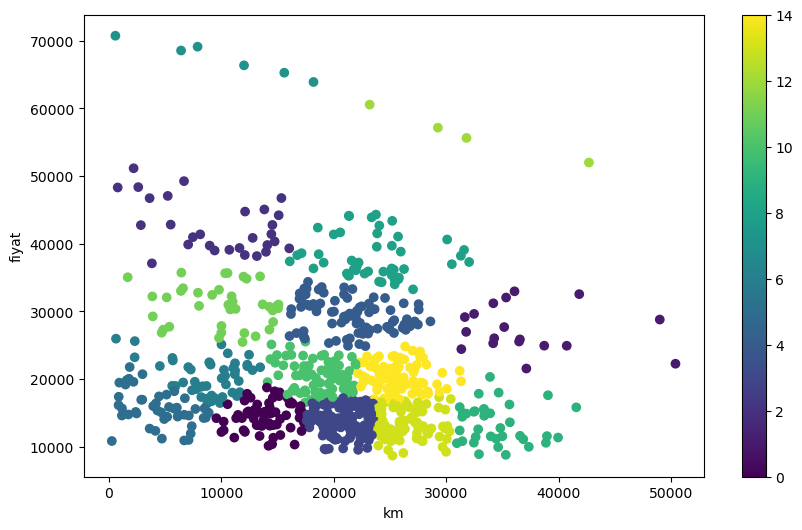

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price, c=tahmin)
plt.colorbar()
plt.xlabel("km")
plt.ylabel("fiyat");

In [17]:
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.45114534464682343
0.4132107715071879
0.4101002619225028


/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.35521832097042355
0.36389685315629733
0.35735251442115545
0.3661695160930053


/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.34795011851819335


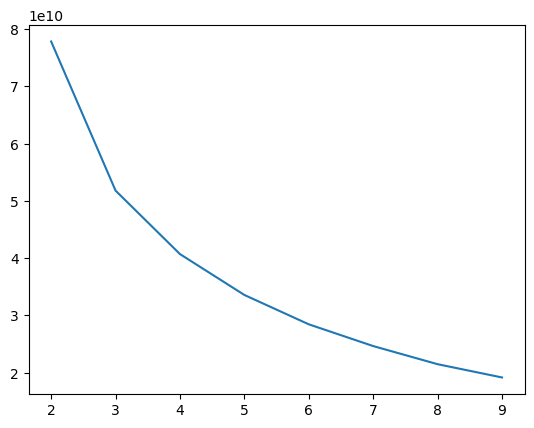

In [18]:
plt.plot(range(2,10),wcss)

In [19]:
import seaborn as sns

<Axes: >

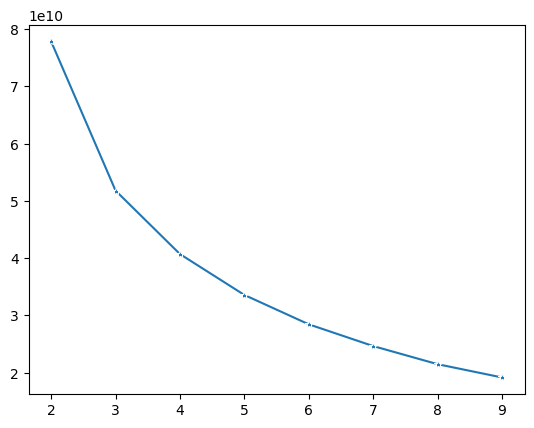

In [20]:
sns.lineplot(x=range(2,10),y=wcss,marker="*")

In [21]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [22]:
from yellowbrick.cluster import KElbowVisualizer

/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/emirkaanozdemir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

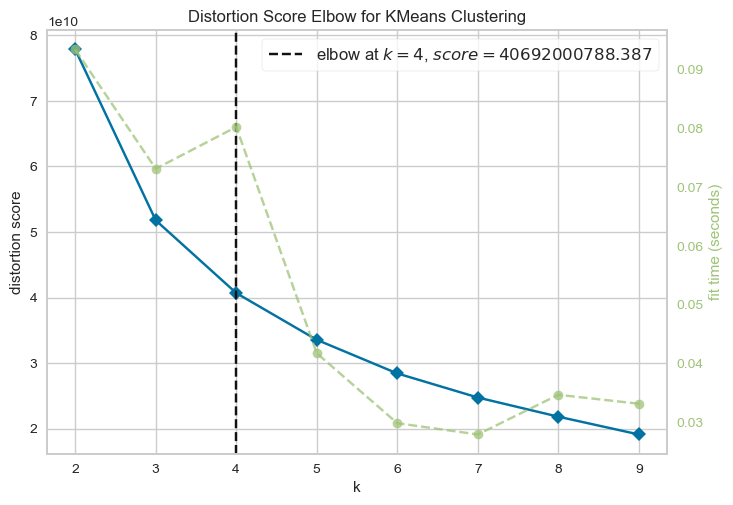

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show()

In [24]:
# Hierarchical Clustering

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [26]:
data=linkage(x, method="ward", metric="euclidean")

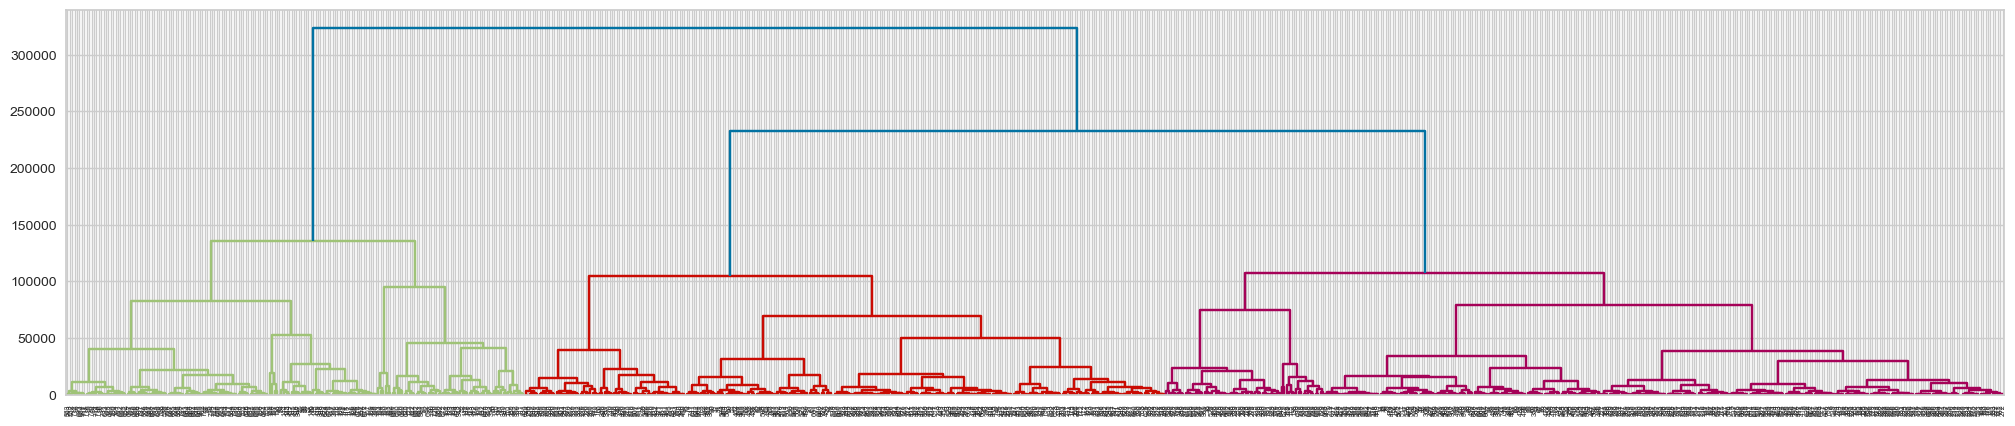

In [27]:
plt.figure(figsize=(25,5))
dendrogram(data);

In [28]:
df=pd.read_csv("Billionaires.csv")

In [29]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


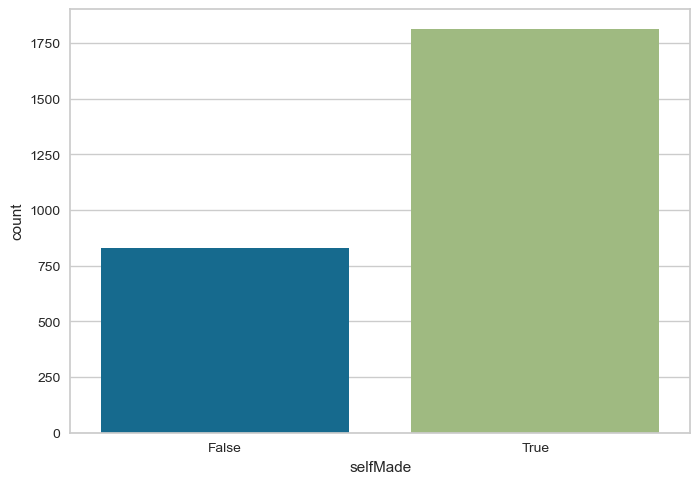

In [30]:
sns.countplot(x=df["selfMade"]);

<Axes: xlabel='count', ylabel='country'>

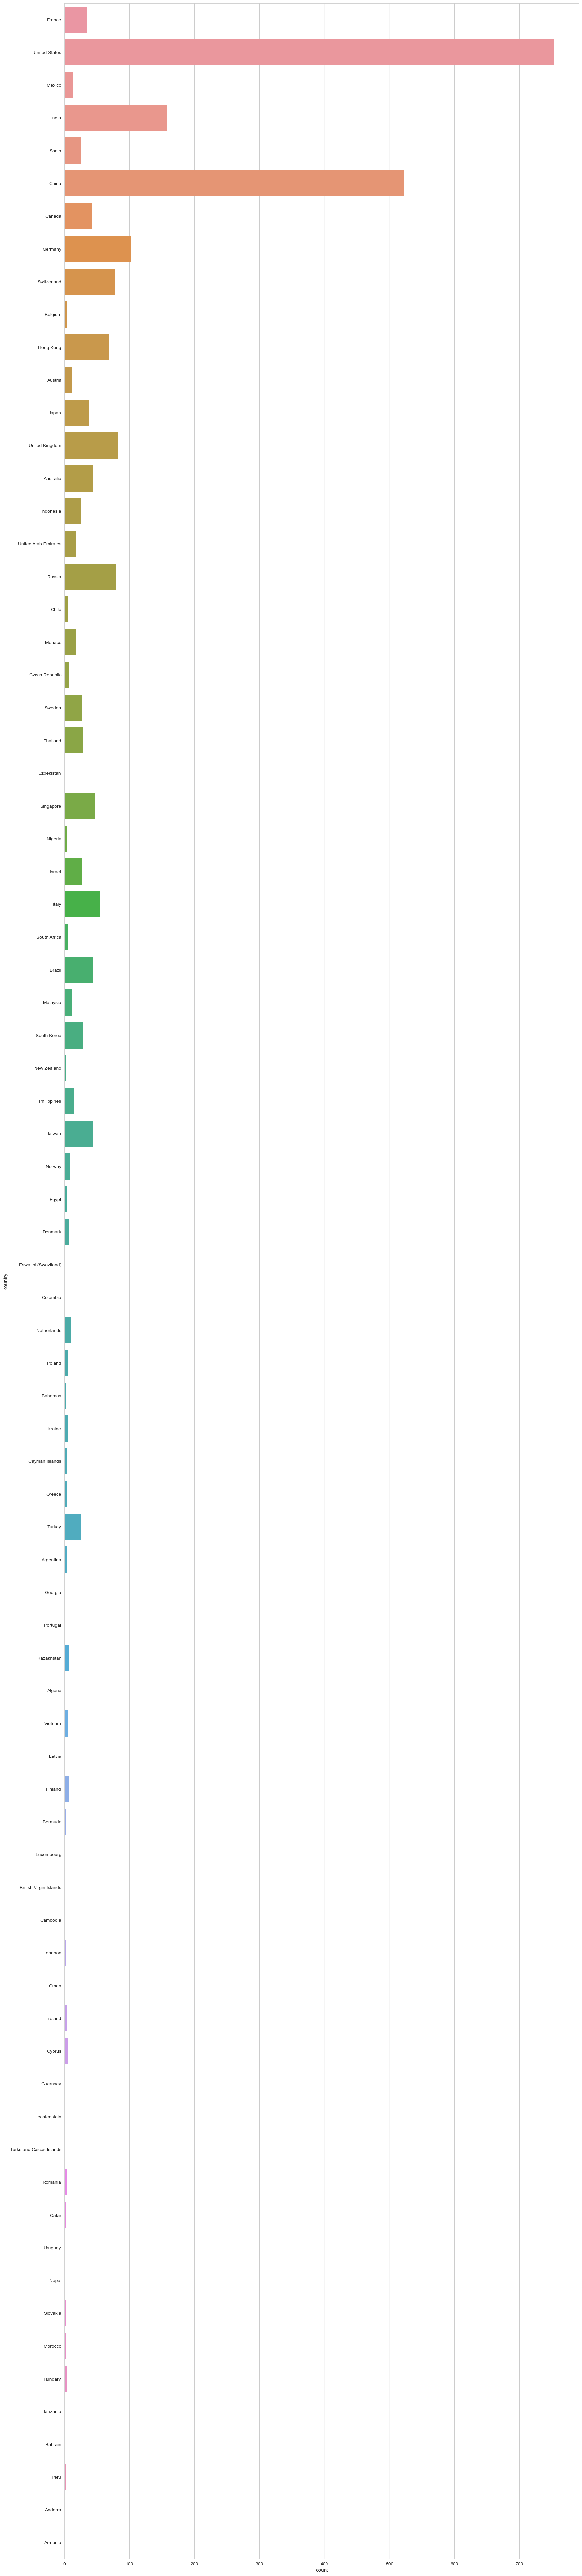

In [31]:
plt.figure(figsize=(20,100))
sns.countplot(y=df["country"])

In [32]:
ydf=df["country"].value_counts().sort_values(ascending=False)

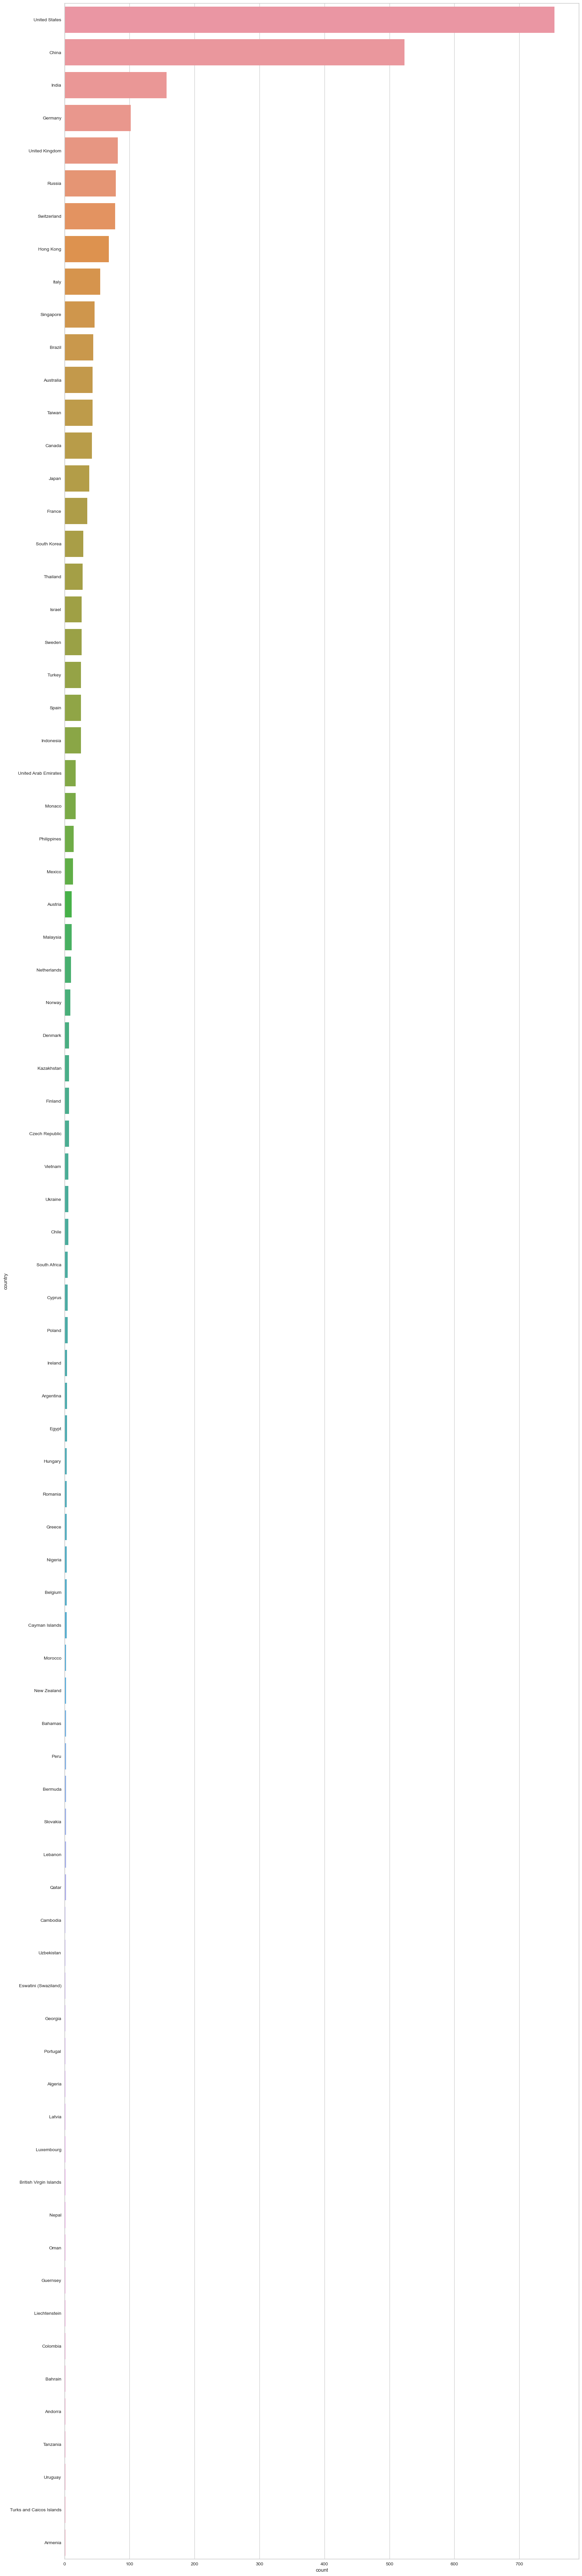

In [33]:
plt.figure(figsize=(20,100))
sns.countplot(y=df["country"], order=ydf.index);

In [34]:
turkey=df[df["country"]=="Turkey"]

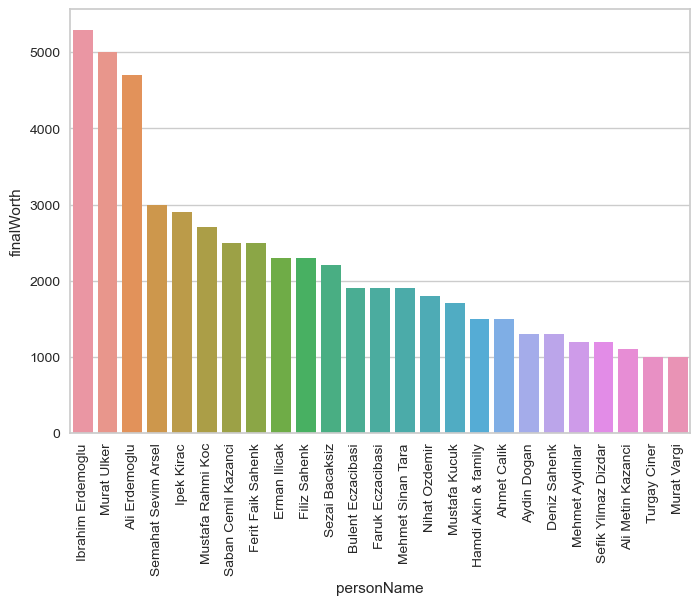

In [35]:
sns.barplot(x=turkey["personName"], y=turkey["finalWorth"])
plt.xticks(rotation=90);

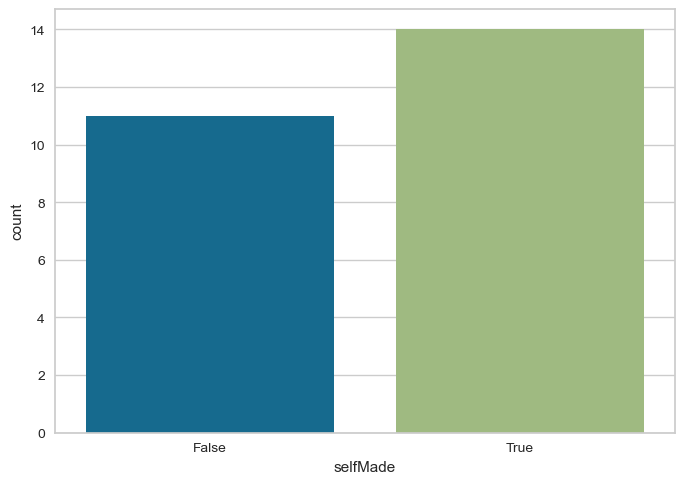

In [36]:
sns.countplot(x=turkey["selfMade"]);

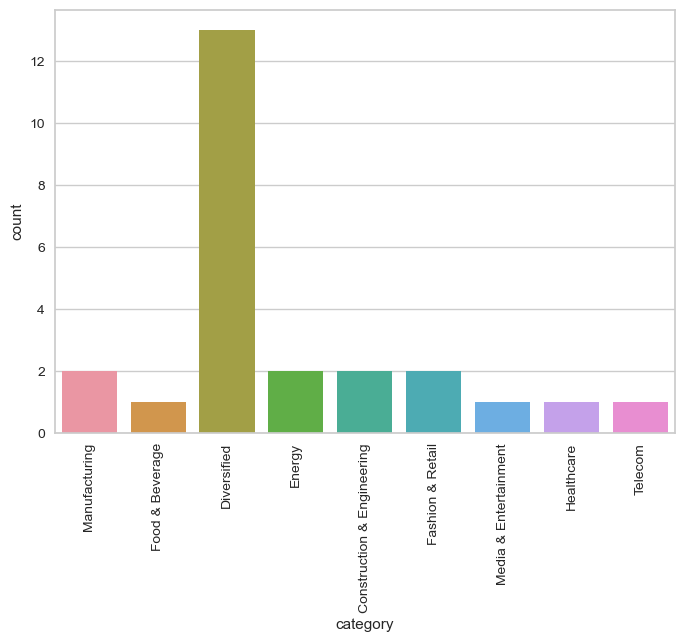

In [37]:
sns.countplot(x=turkey['category'])
plt.xticks(rotation=90)
plt.show()

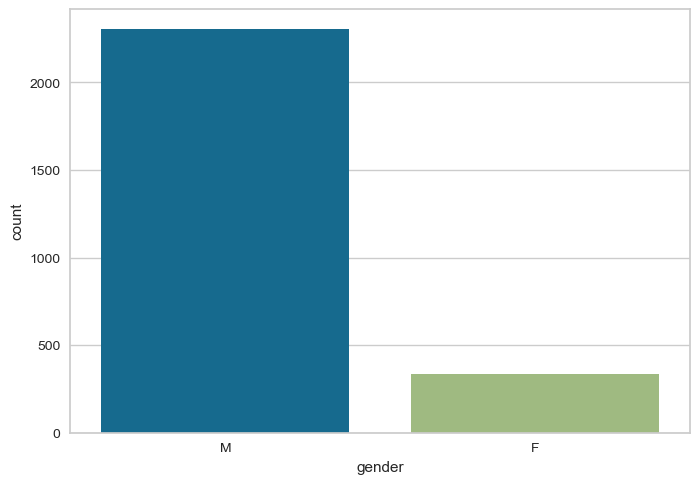

In [38]:
sns.countplot(x=df.gender);

<Axes: xlabel='gender', ylabel='count'>

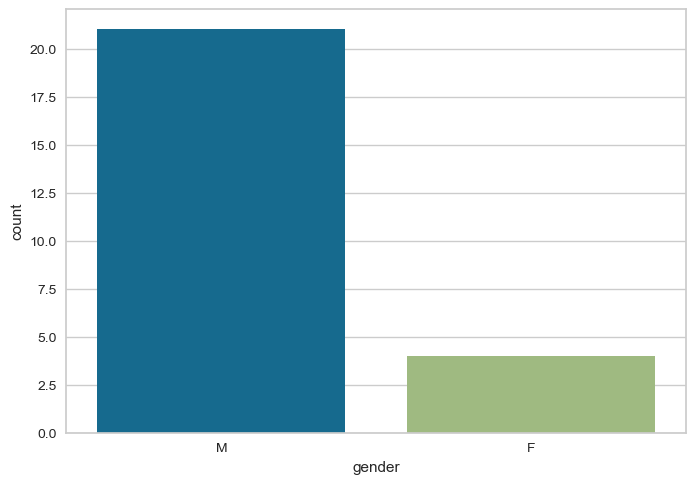

In [39]:
sns.countplot(x=turkey.gender)